In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("D:\kedar\csv files\spam_ham_dataset.csv")

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
df.groupby(['label']).describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [7]:
d=df.copy()

In [8]:
d


,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [9]:
d.drop(['label_num'],axis=1,inplace=True)

In [10]:
d


,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [11]:
d.groupby(['label']).describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
spam   1499   1462                                      Subject: \r\n   16

In [12]:
d['spam']=d['label'].apply(lambda x: 1 if x=='spam' else 0)

In [13]:
d

,label,text,spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y=d['spam']

In [16]:
x=d['text']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
v=CountVectorizer()

In [22]:
v

CountVectorizer()

In [23]:
x_train_count=v.fit_transform(x_train.values)

In [24]:
x_train_count

<4136x45124 sparse matrix of type '<class 'numpy.int64'>'
	with 366861 stored elements in Compressed Sparse Row format>

In [25]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [1, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
x_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
model=MultinomialNB()

model.fit(x_train_count,y_train)

In [34]:
model.fit(x_train_count,y_train)

MultinomialNB()

In [35]:
x_test_count=v.transform(x_test)

In [36]:
x_test_count

<1035x45124 sparse matrix of type '<class 'numpy.int64'>'
	with 83731 stored elements in Compressed Sparse Row format>

In [37]:
x_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
y_predict=model.predict(x_test_count)

In [39]:
model.score(x_test_count,y_test)

0.9748792270531401

In [40]:
emails=['proof-of-stake: how etherum next big thing','get job today', 'get credit cards']

In [41]:
emails_count=v.transform(emails)

In [42]:
emails_count

<1x45124 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [43]:
model.predict(emails_count)

array([1], dtype=int64)

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
p=Pipeline([('vectorizer',CountVectorizer()),('NB',MultinomialNB())])

In [47]:
p.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

In [48]:
print(p)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])


In [49]:
p.score(x_test,y_test)

0.9748792270531401

In [50]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [51]:
performance=confusion_matrix(y_test,y_predict)

In [52]:
performance

array([[738,  11],
       [ 15, 271]], dtype=int64)

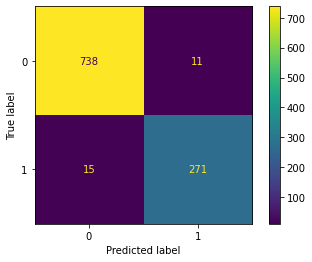

In [53]:
plot_confusion_matrix(model,x_test_count,y_test)
plt.show()